# This file show examples for vision-tasks 

## Connect to the server with OpenAI python SDK

In [21]:
from openai import OpenAI

client = OpenAI(
    base_url="http://localhost:8000/v1",
    api_key="fake-api-key",
)


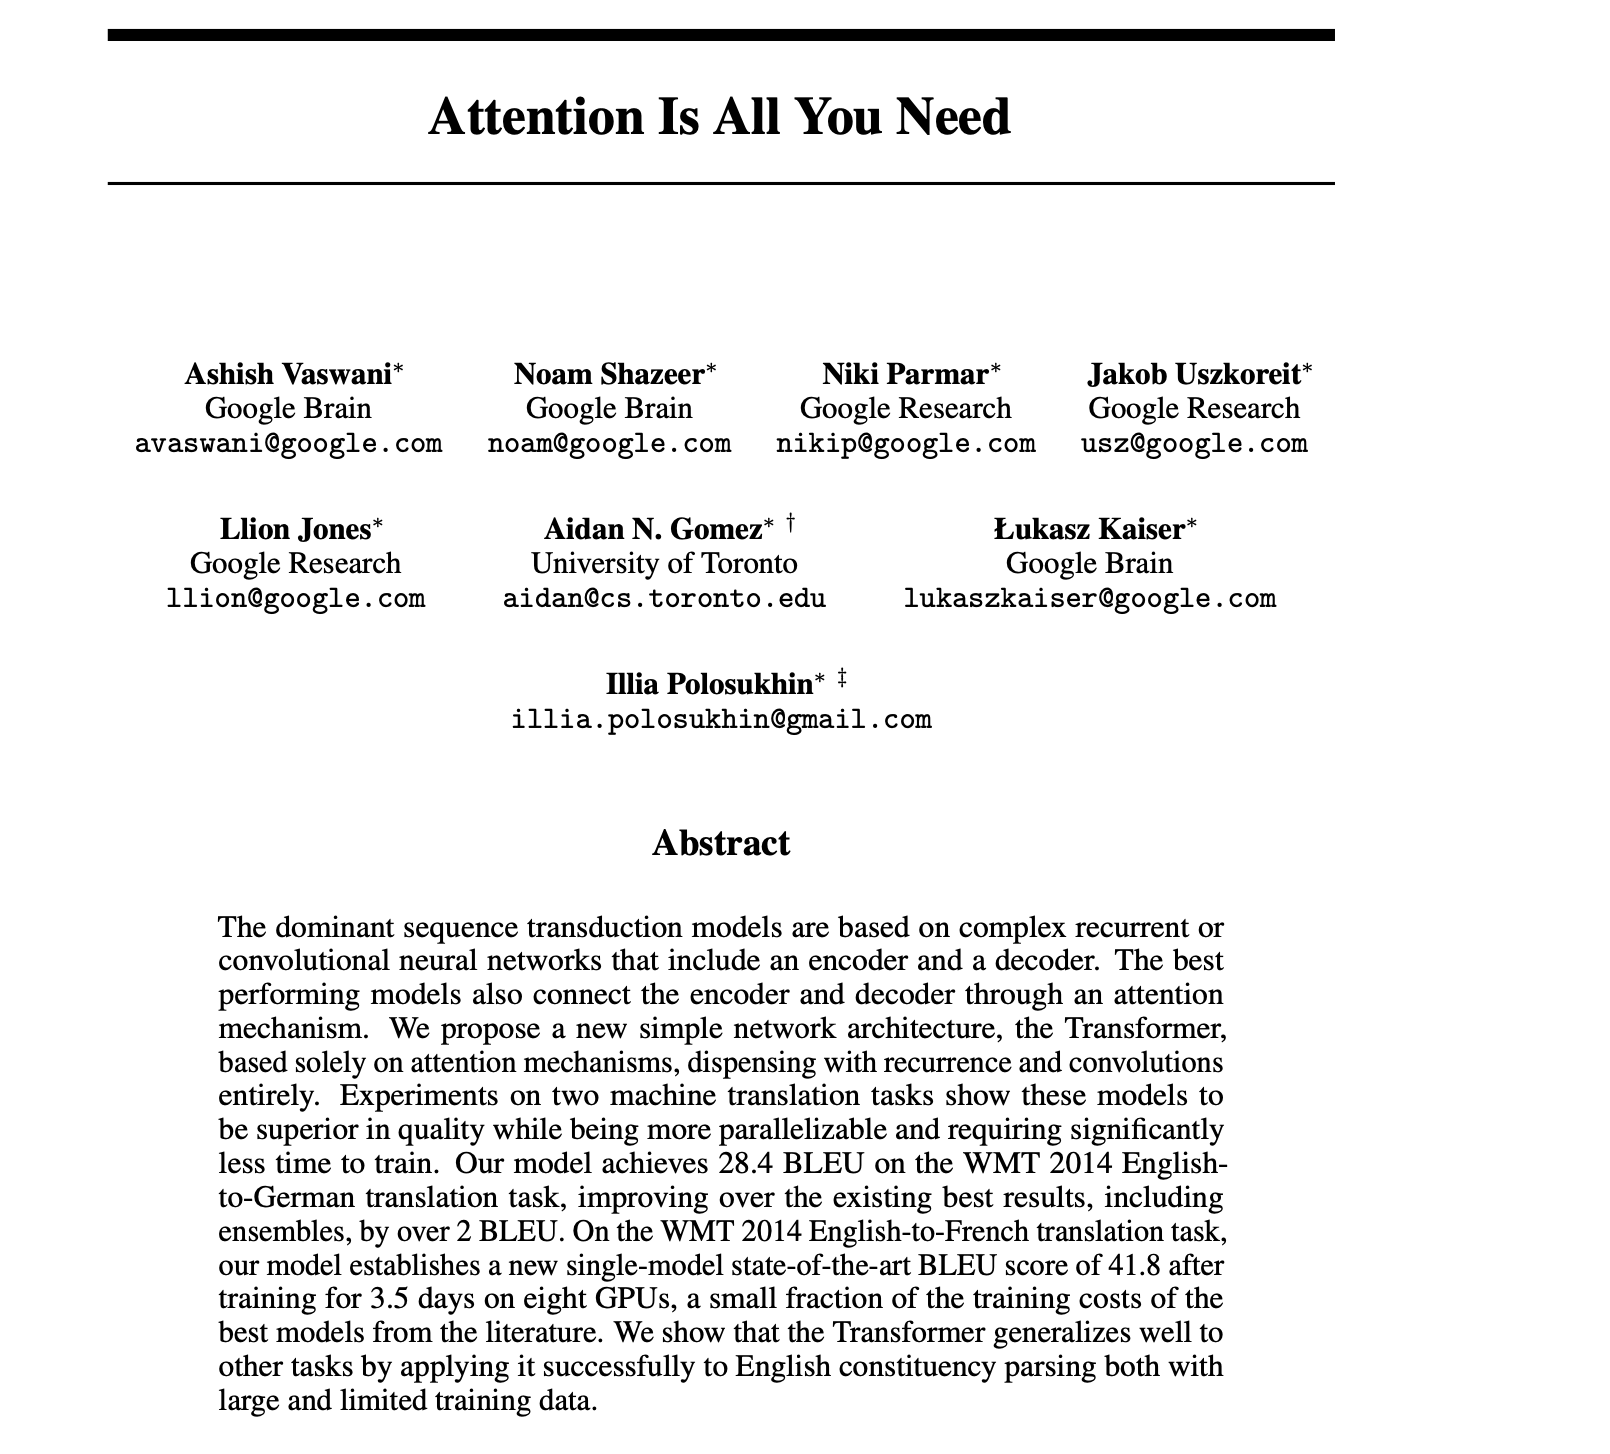

In [22]:
from PIL import Image
import base64
import os
from io import BytesIO

image = Image.open("images/attention.png")
image

In [23]:
def file_to_base64(image: Image.Image):
    """Example 1: Load an image file and convert to base64."""    
    # Convert image to bytes
    buffer = BytesIO()
    image.save(buffer, format="PNG")
    buffer.seek(0)
    image_data = buffer.getvalue()
    
    # Encode as base64
    image_base64 = base64.b64encode(image_data).decode('utf-8')
    
    # Create the data URI format required by the API
    mime_type = "image/png"  
    image_uri = f"data:{mime_type};base64,{image_base64}"
    
    return image_uri

## Task extract text from image

In [28]:
image_uri = file_to_base64(image)

# Make a request to the server
response = client.chat.completions.create(
    model="gemma3-27b",
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant that can extract text from an image."
        },
        {
            "role": "user", "content": [
            {
                "type": "image_url",
                "image_url": {
                    "url": image_uri
                }
            },
            {
                "type": "text",
                "text": "Extract all authors from the image with their affiliations in a beautiful formated text."
            }
        ]
        }
    ],
    max_tokens = 1024
)

print(response.choices[0].message.content)

Here's the extracted author list with their affiliations, formatted for readability:

**Authors & Affiliations**

*   **Ashish Vaswani** - Google Brain (avaswani@google.com)
*   **Noam Shazeer** - Google Research (noam@google.com)
*   **Niki Parmar** - Google Research (nikip@google.com)
*   **Jakob Uszkoreit** - Google Research (usz@google.com)
*   **Llion Jones** - Google Research (llion@google.com)
*   **Aidan N. Gomez** - University of Toronto (aidan@cs.toronto.edu)
*   **Łukasz Kaiser** - Google Brain (lukaszkaiser@google.com)
*   **Ilia Polosukhin** - Google (illia.polosukhin@gmail.com)


In [29]:
image_uri = file_to_base64(image)

# Make a request to the server
response = client.chat.completions.create(
    model="gemma3-27b",
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant that can extract text from an image."
        },
        {
            "role": "user", "content": [
            {
                "type": "image_url",
                "image_url": {
                    "url": image_uri
                }
            },
            {
                "type": "text",
                "text": "Extract the `Abstract` section from the image in a beautiful formated text."
            }
        ]
        }
    ],
    max_tokens = 1024
)

print(response.choices[0].message.content)

Here's the extracted and formatted "Abstract" section from the image:

---

**Abstract**

The dominant sequence transduction models are based on complex recurrent or convolutional neural networks that include an encoder and a decoder. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, based solely on attention mechanisms, with recurrence and convolutions entirely. Experiments on two machine translation tasks demonstrate that the Transformer is superior in quality while requiring significantly less time to train. Our model achieves 28.4 BLEU on the WMT 2014 English-to-German translation task, improving over the existing best results, including ensembles, by over 2 BLEU. On the English-to-French translation task, our model establishes a new state-of-the-art score of 41.8 after training for 3.5 days on eight GPUs, a small fraction of the training costs of the best models from the li